In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D,Input,Lambda, Conv2DTranspose, Flatten

2024-08-27 13:47:17.570270: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 13:47:17.583524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 13:47:17.600195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 13:47:17.604324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 13:47:17.615964: I tensorflow/core/platform/cpu_feature_guar

In [19]:
layers =[3,16,32,64,128]
upsamplers = [Conv2D(i,3,(2,2),activation="relu") for i in layers[1:]]
downsamplers = [Conv2DTranspose(i,3,(2,2),activation="relu" if i != layers[-1] else "sigmoid") for i in reversed(layers[:-1])]

inputs = Input(shape=(207, 175, 3))
x = Lambda(lambda x:x/255.)(inputs)
for layer in upsamplers:
    x = layer(x)
# x = Flatten()(x)
x = Dense(128)(x)
x = Dense(128)(x)
x = Dense(128)(x)
for layer in downsamplers:
    x = layer(x)


model = tf.keras.Model(inputs,x)

model.load_weights("denoising_autoencoder.h5")

In [20]:
import numpy as np
test_org = np.load('test_org.npy')
test_noise = np.load('test_noise.npy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


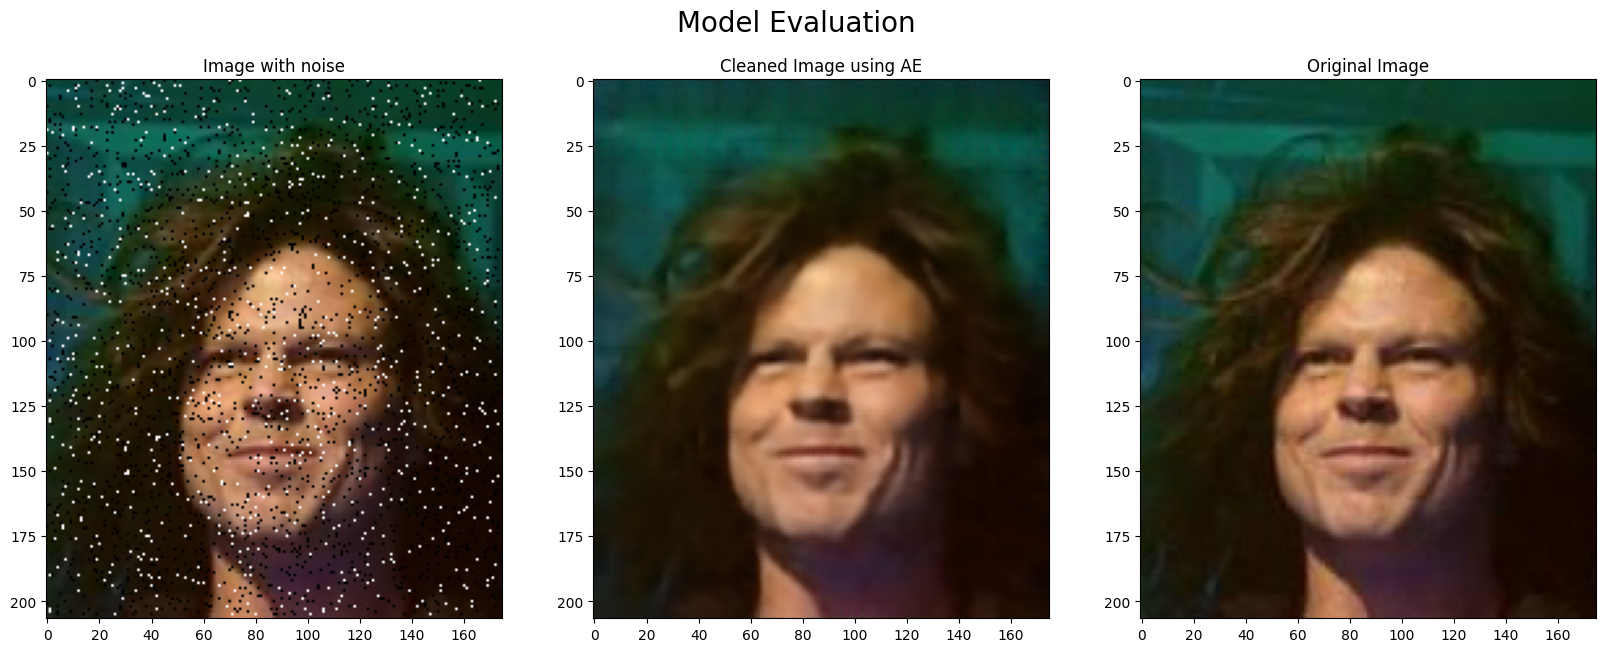

In [77]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(20,7)).suptitle("Model Evaluation",fontsize=20)
r = random.randint(0,len(test_org))
plt.subplot(1,3,1)
plt.title("Image with noise")
plt.imshow(test_noise[r])
plt.subplot(1,3,2)
plt.title("Cleaned Image using AE")
plt.imshow(np.array(np.round(model.predict(np.expand_dims(test_noise[r],axis=0))[0]),dtype="int"))
plt.subplot(1,3,3)
plt.title("Original Image")
plt.imshow(test_org[r])

In [29]:
np.array(np.round(model.predict(np.expand_dims(test_noise[r],axis=0))[0]),dtype="int")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[[ 12,  13,  15],
        [ 13,  14,  18],
        [ 12,  13,  17],
        ...,
        [ 18,  17,  17],
        [ 17,  17,  17],
        [ 16,  15,  14]],

       [[ 10,  13,  18],
        [ 12,  14,  20],
        [ 11,  13,  19],
        ...,
        [ 16,  17,  17],
        [ 18,  17,  16],
        [ 17,  17,  16]],

       [[ 10,  12,  17],
        [ 12,  14,  20],
        [ 10,  12,  19],
        ...,
        [ 16,  16,  17],
        [ 17,  15,  14],
        [ 17,  16,  15]],

       ...,

       [[146,  97,  63],
        [144,  86,  48],
        [148,  87,  55],
        ...,
        [ 91,  41,  32],
        [103,  54,  40],
        [ 99,  55,  33]],

       [[141,  94,  72],
        [160,  87,  46],
        [150,  83,  55],
        ...,
        [102,  48,  32],
        [ 97,  48,  41],
        [103,  57,  31]],

       [[130,  99,  69],
        [139,  93,  71],
        [151,  93,  61],
        ...,
        [102,  55,  34],
        [ 97,  58,  46],
        [ 90,  53,  32]]